In [284]:
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import geoplot.crs as gcrs
import geoplot as gplt

In [164]:
# Merge all df_mapillary csv files into one
joined_files = os.path.join("/Users/wooyongjung/WJ_Projects/homeless_sf_2024/data/df_mapillary_sf", "*.csv")
joined_list = glob.glob(joined_files)
joined_list = sorted(joined_list)

# Create a new column 'chunk_id' for each file
for i, file in enumerate(joined_list):
    df_temp = pd.read_csv(file)
    df_temp['chunk_id'] = 'chunk_' + str(i)
    df_temp.to_csv(file, index=False)

In [165]:
# Merge all csv files into one
df = pd.concat(map(pd.read_csv, joined_list))

# Drop bbox_id
df = df.drop(['bbox_id'], axis=1)

# Convert the unix timestamp to datetime
df['image_timestamp'] = pd.to_datetime(df['image_timestamp_unix'], unit='ms')

# Drop duplicates based on both 'image_id' and 'image_timestamp_unix' simultaneously
df = df.drop_duplicates(subset=['image_id', 'image_timestamp_unix'], keep='first')

# Extract year and month from the image_timestamp
df['year'] = df['image_timestamp'].dt.year
df['month'] = df['image_timestamp'].dt.month

df.head()

/var/folders/y6/z9h695vx2w3gbjh7z32h4j9m0000gn/T/ipykernel_75860/166565936.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat(map(pd.read_csv, joined_list))


,Unnamed: 0,image_id,user_id,sequence_id,image_coord,image_timestamp_unix,image_url,image_angle,chunk_id,image_timestamp,year,month
0,0,327669609883423,105986451641170,tpibOxJS5TYZ8V4crsIX9n,"[-122.49810039997101, 37.708604958036545]",1699723630093,https://scontent-iad3-2.xx.fbcdn.net/m1/v/t6/A...,4.955116,chunk_0,2023-11-11 17:27:10.093,2023,11
1,1,303401841368941,102905365286641,14jeyr2dygbpaexrxv7bqb,"[-122.49807357788086, 37.708991157486594]",1495412840007,https://scontent-iad3-2.xx.fbcdn.net/m1/v/t6/A...,7.626879,chunk_0,2017-05-22 00:27:20.007,2017,5
2,2,329903498499807,104408981801642,v66wj3bf8pakks2pq1ws47,"[-122.49806821346283, 37.70853281066343]",1545518762168,https://scontent-iad3-2.xx.fbcdn.net/m1/v/t6/A...,5.560757,chunk_0,2018-12-22 22:46:02.168,2018,12
3,3,274600944394813,104408981801642,52l7p54xlo9r92li3feskq,"[-122.4981701374054, 37.708961449908045]",1531338525997,https://scontent-iad3-2.xx.fbcdn.net/m1/v/t6/A...,183.032623,chunk_0,2018-07-11 19:48:45.997,2018,7
4,4,519584729064799,104408981801642,d85uqp4g9lwq0vzt32vao1,"[-122.49844908714294, 37.70762884056478]",1531702119180,https://scontent-iad3-2.xx.fbcdn.net/m1/v/t6/A...,185.561066,chunk_0,2018-07-16 00:48:39.180,2018,7


In [166]:
# Load df_bboxid and merge to the main data frame
joined_files = os.path.join("/Users/wooyongjung/WJ_Projects/homeless_sf_2024/data/df_bboxid", "*.csv")
joined_list = glob.glob(joined_files)
joined_list = sorted(joined_list)

# Select the columns to merge
for i, file in enumerate(joined_list):
    df_temp = pd.read_csv(file)
    df_temp = df_temp[['image_id', 'image_timestamp_unix', 'geoid', 'bboxid']]
    df_temp.to_csv(file, index=False)

# Merge all csv files into one
df_bboxid = pd.concat(map(pd.read_csv, joined_list))

In [171]:
# Merge df_bboxid to the main data frame
df = pd.merge(df, df_bboxid.drop_duplicates(subset=['image_id'], keep='first'), on=['image_id', 'image_timestamp_unix'], how='left')

In [179]:
# Drop NaN values for geoid and bboxid
df = df.dropna(subset=['geoid', 'bboxid'])

# Drop Unnamed: 0 column
df = df.drop(['Unnamed: 0'], axis=1)

# Reset index
df = df.reset_index(drop=True)
df.shape

(1852845, 13)

In [182]:
df.head()

,image_id,user_id,sequence_id,image_coord,image_timestamp_unix,image_url,image_angle,chunk_id,image_timestamp,year,month,geoid,bboxid
0,327669609883423,105986451641170,tpibOxJS5TYZ8V4crsIX9n,"[-122.49810039997101, 37.708604958036545]",1699723630093,https://scontent-iad3-2.xx.fbcdn.net/m1/v/t6/A...,4.955116,chunk_0,2023-11-11 17:27:10.093,2023,11,60750604002,bbox_2_7
1,303401841368941,102905365286641,14jeyr2dygbpaexrxv7bqb,"[-122.49807357788086, 37.708991157486594]",1495412840007,https://scontent-iad3-2.xx.fbcdn.net/m1/v/t6/A...,7.626879,chunk_0,2017-05-22 00:27:20.007,2017,5,60750604002,bbox_2_7
2,329903498499807,104408981801642,v66wj3bf8pakks2pq1ws47,"[-122.49806821346283, 37.70853281066343]",1545518762168,https://scontent-iad3-2.xx.fbcdn.net/m1/v/t6/A...,5.560757,chunk_0,2018-12-22 22:46:02.168,2018,12,60750604002,bbox_2_7
3,274600944394813,104408981801642,52l7p54xlo9r92li3feskq,"[-122.4981701374054, 37.708961449908045]",1531338525997,https://scontent-iad3-2.xx.fbcdn.net/m1/v/t6/A...,183.032623,chunk_0,2018-07-11 19:48:45.997,2018,7,60750604002,bbox_2_7
4,519584729064799,104408981801642,d85uqp4g9lwq0vzt32vao1,"[-122.49844908714294, 37.70762884056478]",1531702119180,https://scontent-iad3-2.xx.fbcdn.net/m1/v/t6/A...,185.561066,chunk_0,2018-07-16 00:48:39.180,2018,7,60750604002,bbox_2_7


In [183]:
# Add 0 to the beginning of GEOID
df['geoid'] = df['geoid'].astype(str)
df['geoid'] = df['geoid'].apply(lambda x: x.zfill(12))

In [184]:
df.head()

,image_id,user_id,sequence_id,image_coord,image_timestamp_unix,image_url,image_angle,chunk_id,image_timestamp,year,month,geoid,bboxid
0,327669609883423,105986451641170,tpibOxJS5TYZ8V4crsIX9n,"[-122.49810039997101, 37.708604958036545]",1699723630093,https://scontent-iad3-2.xx.fbcdn.net/m1/v/t6/A...,4.955116,chunk_0,2023-11-11 17:27:10.093,2023,11,060750604002,bbox_2_7
1,303401841368941,102905365286641,14jeyr2dygbpaexrxv7bqb,"[-122.49807357788086, 37.708991157486594]",1495412840007,https://scontent-iad3-2.xx.fbcdn.net/m1/v/t6/A...,7.626879,chunk_0,2017-05-22 00:27:20.007,2017,5,060750604002,bbox_2_7
2,329903498499807,104408981801642,v66wj3bf8pakks2pq1ws47,"[-122.49806821346283, 37.70853281066343]",1545518762168,https://scontent-iad3-2.xx.fbcdn.net/m1/v/t6/A...,5.560757,chunk_0,2018-12-22 22:46:02.168,2018,12,060750604002,bbox_2_7
3,274600944394813,104408981801642,52l7p54xlo9r92li3feskq,"[-122.4981701374054, 37.708961449908045]",1531338525997,https://scontent-iad3-2.xx.fbcdn.net/m1/v/t6/A...,183.032623,chunk_0,2018-07-11 19:48:45.997,2018,7,060750604002,bbox_2_7
4,519584729064799,104408981801642,d85uqp4g9lwq0vzt32vao1,"[-122.49844908714294, 37.70762884056478]",1531702119180,https://scontent-iad3-2.xx.fbcdn.net/m1/v/t6/A...,185.561066,chunk_0,2018-07-16 00:48:39.180,2018,7,060750604002,bbox_2_7


In [186]:
df.shape

(1852845, 13)

In [198]:
# Load San Francisco Census Block Group shapefile
data_path = '/Users/wooyongjung/WJ_Projects/homeless_sf_2024/data/tl_2021_06_bg/tl_2021_06_bg.shp'
census_bg = gpd.read_file(data_path)
census_bg = census_bg.to_crs(crs=4326)
census_bg = census_bg[census_bg['GEOID'].str.startswith('06075')]
census_bg = census_bg[['GEOID', 'geometry']]
census_bg.head()


,GEOID,geometry
949,060750210004,"POLYGON ((-122.42478 37.74865, -122.42368 37.7..."
952,060750209003,"POLYGON ((-122.42051 37.75051, -122.41994 37.7..."
953,060750210001,"POLYGON ((-122.42539 37.75504, -122.42482 37.7..."
954,060750210003,"POLYGON ((-122.42510 37.75185, -122.42452 37.7..."
955,060750211001,"POLYGON ((-122.43012 37.75636, -122.42789 37.7..."


In [206]:
# Merge the main data frame with the census block group shapefile
df = pd.merge(df, census_bg, left_on='geoid', right_on='GEOID', how='left')

In [207]:
df.shape

(1852845, 15)

In [208]:
df.head()

,image_id,user_id,sequence_id,image_coord,image_timestamp_unix,image_url,image_angle,chunk_id,image_timestamp,year,month,geoid,bboxid,GEOID,geometry
0,327669609883423,105986451641170,tpibOxJS5TYZ8V4crsIX9n,"[-122.49810039997101, 37.708604958036545]",1699723630093,https://scontent-iad3-2.xx.fbcdn.net/m1/v/t6/A...,4.955116,chunk_0,2023-11-11 17:27:10.093,2023,11,060750604002,bbox_2_7,060750604002,"POLYGON ((-122.51273 37.73509, -122.51008 37.7..."
1,303401841368941,102905365286641,14jeyr2dygbpaexrxv7bqb,"[-122.49807357788086, 37.708991157486594]",1495412840007,https://scontent-iad3-2.xx.fbcdn.net/m1/v/t6/A...,7.626879,chunk_0,2017-05-22 00:27:20.007,2017,5,060750604002,bbox_2_7,060750604002,"POLYGON ((-122.51273 37.73509, -122.51008 37.7..."
2,329903498499807,104408981801642,v66wj3bf8pakks2pq1ws47,"[-122.49806821346283, 37.70853281066343]",1545518762168,https://scontent-iad3-2.xx.fbcdn.net/m1/v/t6/A...,5.560757,chunk_0,2018-12-22 22:46:02.168,2018,12,060750604002,bbox_2_7,060750604002,"POLYGON ((-122.51273 37.73509, -122.51008 37.7..."
3,274600944394813,104408981801642,52l7p54xlo9r92li3feskq,"[-122.4981701374054, 37.708961449908045]",1531338525997,https://scontent-iad3-2.xx.fbcdn.net/m1/v/t6/A...,183.032623,chunk_0,2018-07-11 19:48:45.997,2018,7,060750604002,bbox_2_7,060750604002,"POLYGON ((-122.51273 37.73509, -122.51008 37.7..."
4,519584729064799,104408981801642,d85uqp4g9lwq0vzt32vao1,"[-122.49844908714294, 37.70762884056478]",1531702119180,https://scontent-iad3-2.xx.fbcdn.net/m1/v/t6/A...,185.561066,chunk_0,2018-07-16 00:48:39.180,2018,7,060750604002,bbox_2_7,060750604002,"POLYGON ((-122.51273 37.73509, -122.51008 37.7..."


In [209]:
# Create a GeoDataFrame with df (geometry column, CBG level)
df_geo = gpd.GeoDataFrame(df, geometry=df['geometry'], crs=4326)

<Axes: >

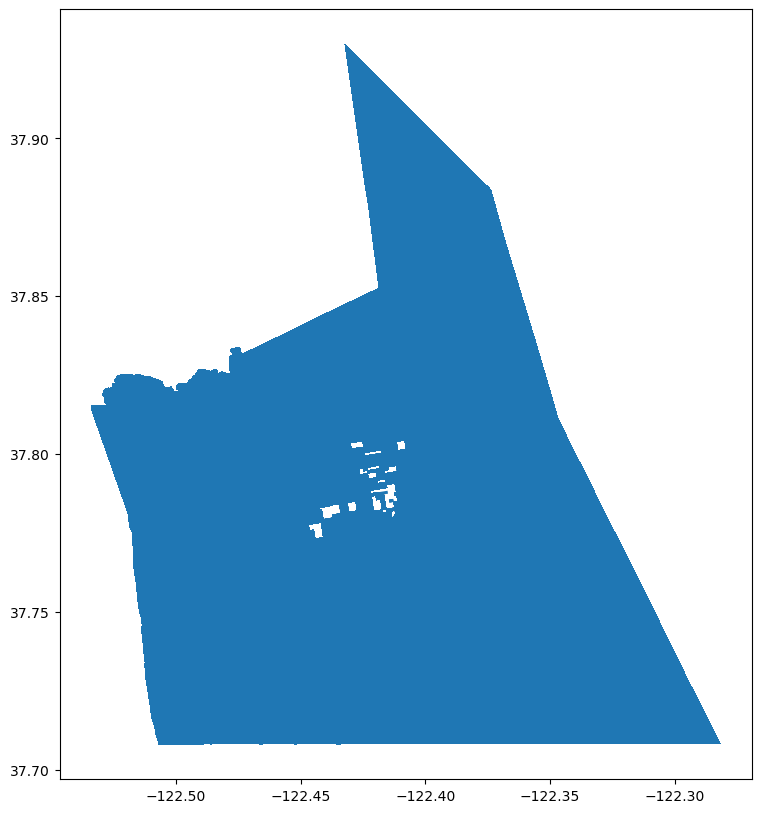

In [211]:
df_geo.plot(figsize=(10, 10))

In [213]:
df_geo.shape

(1852845, 15)

## EDA

### Spatial Aspects

In [219]:
# Descriptive statistics
df_geo.groupby(['geoid']).size().reset_index(name='counts').sort_values(by='counts', ascending=False).describe()

,counts
count,645.000000
mean,2872.627907
std,4977.872974
min,1.000000
25%,765.000000
50%,1566.000000
75%,2964.000000
max,48817.000000


In [220]:
df_geo.groupby(['bboxid']).size().reset_index(name='counts').sort_values(by='counts', ascending=False).describe()

,counts
count,4156.000000
mean,445.824110
std,1161.315969
min,1.000000
25%,133.000000
50%,272.000000
75%,492.250000
max,46908.000000


<Axes: ylabel='Frequency'>

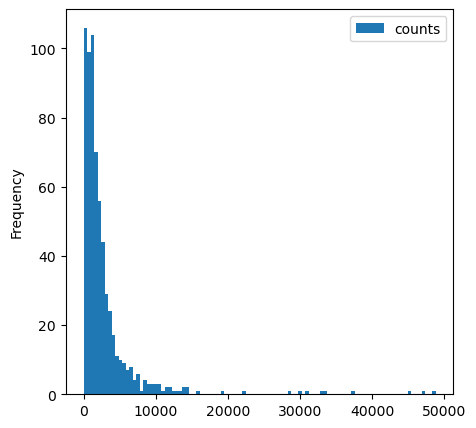

In [222]:
# Histogram for CBG-level counts
df_geo.groupby(['geoid']).size().reset_index(name='counts').sort_values(by='counts', ascending=False).plot(kind='hist', bins=100, figsize=(5, 5))

<Axes: ylabel='Frequency'>

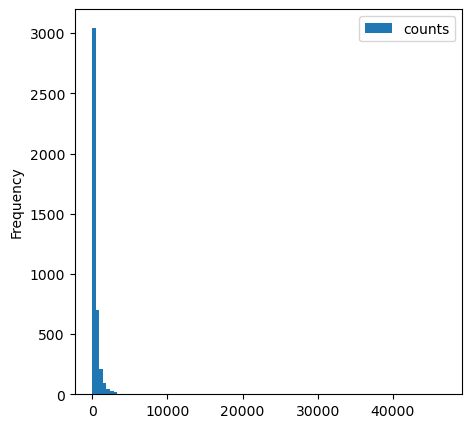

In [223]:
# Histogram for bbox-level counts
df_geo.groupby(['bboxid']).size().reset_index(name='counts').sort_values(by='counts', ascending=False).plot(kind='hist', bins=100, figsize=(5, 5))

In [226]:
df_geo.head(2)

,image_id,user_id,sequence_id,image_coord,image_timestamp_unix,image_url,image_angle,chunk_id,image_timestamp,year,month,geoid,bboxid,GEOID,geometry
0,327669609883423,105986451641170,tpibOxJS5TYZ8V4crsIX9n,"[-122.49810039997101, 37.708604958036545]",1699723630093,https://scontent-iad3-2.xx.fbcdn.net/m1/v/t6/A...,4.955116,chunk_0,2023-11-11 17:27:10.093,2023,11,060750604002,bbox_2_7,060750604002,"POLYGON ((-122.51273 37.73509, -122.51008 37.7..."
1,303401841368941,102905365286641,14jeyr2dygbpaexrxv7bqb,"[-122.49807357788086, 37.708991157486594]",1495412840007,https://scontent-iad3-2.xx.fbcdn.net/m1/v/t6/A...,7.626879,chunk_0,2017-05-22 00:27:20.007,2017,5,060750604002,bbox_2_7,060750604002,"POLYGON ((-122.51273 37.73509, -122.51008 37.7..."


In [245]:
# Load bbox dataset
df_bbox = pd.read_csv('data/df_bbox_99.csv')

# Select the rows with GEOID starting with 06075 (San Francisci County)
df_bbox['GEOID'] = df_bbox['GEOID'].astype(str)

# Add 0 to the beginning of GEOID
df_bbox['GEOID'] = df_bbox['GEOID'].apply(lambda x: x.zfill(12))
df_bbox = df_bbox[df_bbox['GEOID'].str.startswith('06075')]

# Reset index
df_bbox.reset_index(inplace=True, drop=True)

# Drop the first column Unnamed: 0
df_bbox = df_bbox.drop(['Unnamed: 0'], axis=1)

df_bbox.head()

,row_num,col_num,swne_edges,center_latlon,center_lat,center_lon,GEOID
0,2,0,"(37.70764501104698, -122.5119109755011, 37.709...","(37.70836648101098, -122.51099334475741)",37.708366,-122.510993,060759901000
1,2,1,"(37.70763743908666, -122.51008524507708, 37.70...","(37.70835889471916, -122.50916759688505)",37.708359,-122.509168,060759901000
2,2,2,"(37.70762983885778, -122.50825951533793, 37.70...","(37.70835128015806, -122.50734184969886)",37.708351,-122.507342,060759901000
3,2,3,"(37.70762221036033, -122.50643378628618, 37.70...","(37.70834363732769, -122.50551610320136)",37.708344,-122.505516,060750604002
4,2,4,"(37.707614553594375, -122.5046080579244, 37.70...","(37.708335966228084, -122.50369035739516)",37.708336,-122.503690,060750604002


In [247]:
# Create bboxid column
df_bbox['bboxid'] = 'bbox_' + df_bbox.row_num.astype(str) + '_' +df_bbox.col_num.astype(str)
df_bbox.head()

,row_num,col_num,swne_edges,center_latlon,center_lat,center_lon,GEOID,bboxid
0,2,0,"(37.70764501104698, -122.5119109755011, 37.709...","(37.70836648101098, -122.51099334475741)",37.708366,-122.510993,060759901000,bbox_2_0
1,2,1,"(37.70763743908666, -122.51008524507708, 37.70...","(37.70835889471916, -122.50916759688505)",37.708359,-122.509168,060759901000,bbox_2_1
2,2,2,"(37.70762983885778, -122.50825951533793, 37.70...","(37.70835128015806, -122.50734184969886)",37.708351,-122.507342,060759901000,bbox_2_2
3,2,3,"(37.70762221036033, -122.50643378628618, 37.70...","(37.70834363732769, -122.50551610320136)",37.708344,-122.505516,060750604002,bbox_2_3
4,2,4,"(37.707614553594375, -122.5046080579244, 37.70...","(37.708335966228084, -122.50369035739516)",37.708336,-122.503690,060750604002,bbox_2_4


In [248]:
print(df_geo.shape)
print(df_bbox.shape)

(1852845, 15)
(7439, 8)


In [250]:
# Merge the main data frame with the bbox data frame
df_geo = pd.merge(df_geo, df_bbox[['bboxid','swne_edges','center_latlon']], on='bboxid', how='left')

In [252]:
# Create coordinates
df_geo['swne_edges'] = df_geo['swne_edges'].apply(lambda x: x[1:-1].split(','))

coords = []
for i in range(len(df_geo)):
    coord = [(df_geo['swne_edges'][i][1], df_geo['swne_edges'][i][0]),
             (df_geo['swne_edges'][i][3], df_geo['swne_edges'][i][0]),
             (df_geo['swne_edges'][i][3], df_geo['swne_edges'][i][2]),
             (df_geo['swne_edges'][i][1], df_geo['swne_edges'][i][2])]
    coords.append(coord)

df_geo['coords'] = coords

In [268]:
from shapely.geometry import Polygon, LineString, Point, MultiPolygon
# Create a new GeoDataFrame based on coords
# Apply Polygon to coords
df_geo_bbox = df_geo.copy()
df_geo_bbox['geometry'] = df_geo_bbox['coords'].apply(Polygon)

# Create a new GeoDataFrame based on coords
df_geo_bbox = gpd.GeoDataFrame(df_geo_bbox, geometry=df_geo_bbox['geometry'], crs=4326)

In [269]:
df_geo_bbox.shape

(1852845, 18)

In [270]:
# Select bboxid and geometry and drop duplicates
df_geo_bbox2 = df_geo_bbox[['bboxid','geometry']].drop_duplicates()

# Create a count data frame for bboxid
df_geo_bbox_count = df_geo_bbox.groupby(['bboxid']).size().reset_index(name='counts')
df_geo_bbox_count = pd.merge(df_geo_bbox_count, df_geo_bbox2, on='bboxid', how='left')

# Convert df_geo_bbox_count to GeoDataFrame
df_geo_bbox_count = gpd.GeoDataFrame(df_geo_bbox_count, geometry=df_geo_bbox_count['geometry'], crs=4326)

In [271]:
df_geo_bbox_count.shape

(4156, 3)

In [272]:
df_geo_bbox_count.head()

,bboxid,counts,geometry
0,bbox_10_14,317,"POLYGON ((-122.48627 37.71914, -122.48443 37.7..."
1,bbox_10_15,366,"POLYGON ((-122.48444 37.71913, -122.48261 37.7..."
2,bbox_10_16,190,"POLYGON ((-122.48262 37.71912, -122.48078 37.7..."
3,bbox_10_17,676,"POLYGON ((-122.48079 37.71912, -122.47896 37.7..."
4,bbox_10_18,620,"POLYGON ((-122.47897 37.71911, -122.47713 37.7..."


In [274]:
df_geo_bbox_count['counts'].describe()

count     4156.000000
mean       445.824110
std       1161.315969
min          1.000000
25%        133.000000
50%        272.000000
75%        492.250000
max      46908.000000
Name: counts, dtype: float64

<Axes: >

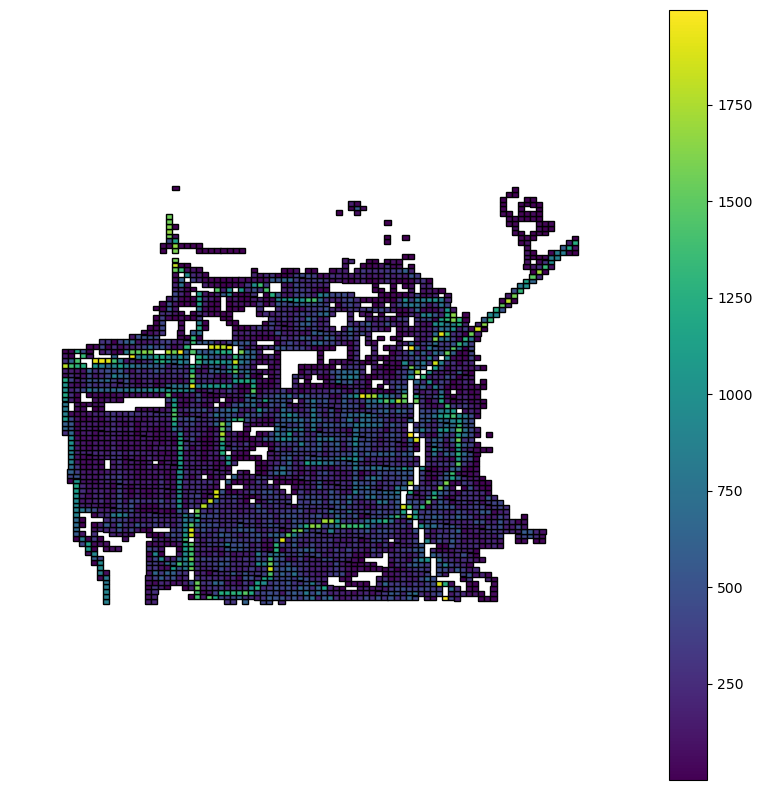

In [287]:
gplt.choropleth(df_geo_bbox_count[df_geo_bbox_count['counts']<2000], hue='counts', cmap='viridis', figsize=(10, 10), legend=True)

In [289]:
# Select bboxid and geometry and drop duplicates
df_geo_2 = df_geo[['geoid','geometry']].drop_duplicates()

# Create a count data frame for bboxid
df_geo_cbg_count = df_geo.groupby(['geoid']).size().reset_index(name='counts')
df_geo_cbg_count = pd.merge(df_geo_cbg_count, df_geo_2, on='geoid', how='left')

# Convert df_geo_bbox_count to GeoDataFrame
df_geo_cbg_count = gpd.GeoDataFrame(df_geo_cbg_count, geometry=df_geo_cbg_count['geometry'], crs=4326)

In [290]:
df_geo_cbg_count.shape

(645, 3)

In [299]:
df_geo_cbg_count.describe()

,counts
count,645.000000
mean,2872.627907
std,4977.872974
min,1.000000
25%,765.000000
50%,1566.000000
75%,2964.000000
max,48817.000000


In [305]:
df_geo_cbg_count[df_geo_cbg_count['counts']>10000]

,geoid,counts,geometry
42,060750117001,37166,"POLYGON ((-122.40751 37.79225, -122.40672 37.7..."
44,060750117003,33331,"POLYGON ((-122.40860 37.78923, -122.40775 37.7..."
69,060750125032,47184,"POLYGON ((-122.41114 37.78508, -122.40950 37.7..."
75,060750127001,30912,"POLYGON ((-122.44959 37.80315, -122.44950 37.8..."
76,060750127002,13450,"POLYGON ((-122.44672 37.80235, -122.44508 37.8..."
195,060750177001,14310,"POLYGON ((-122.41343 37.76904, -122.41339 37.7..."
196,060750177002,10788,"POLYGON ((-122.41931 37.77523, -122.41922 37.7..."
206,060750179031,13728,"MULTIPOLYGON (((-122.33235 37.78237, -122.3315..."
209,060750180002,11995,"POLYGON ((-122.40407 37.77727, -122.40353 37.7..."
211,060750180004,15714,"POLYGON ((-122.41184 37.77114, -122.41128 37.7..."


<Axes: >

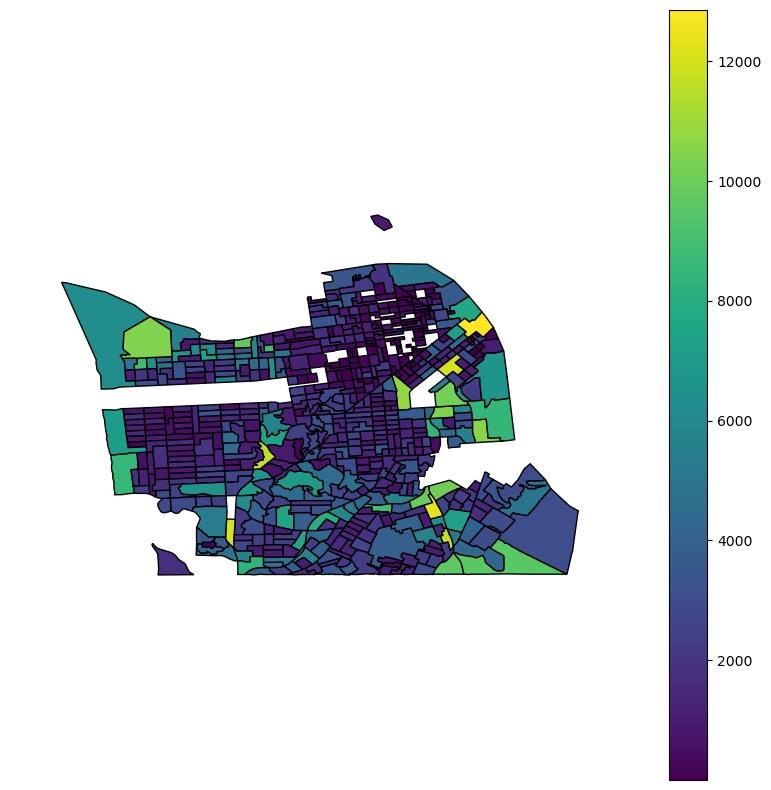

In [306]:
# Plot the geoid-level count on the map
gplt.choropleth(df_geo_cbg_count[df_geo_cbg_count['counts']<13000], hue='counts', cmap='viridis', figsize=(10, 10), legend=True)

In [227]:
df_geo['image_timestamp'].describe()

count                          1852845
mean     2019-01-16 10:42:54.819902976
min                1999-09-23 00:00:00
25%                2016-09-28 11:44:12
50%         2018-08-02 22:16:56.960000
75%                2021-10-13 21:00:37
max         2024-08-06 22:16:23.172000
Name: image_timestamp, dtype: object

### Temporal Aspects

<Axes: title={'center': 'Number of images per year'}, xlabel='Year', ylabel='Number of images'>

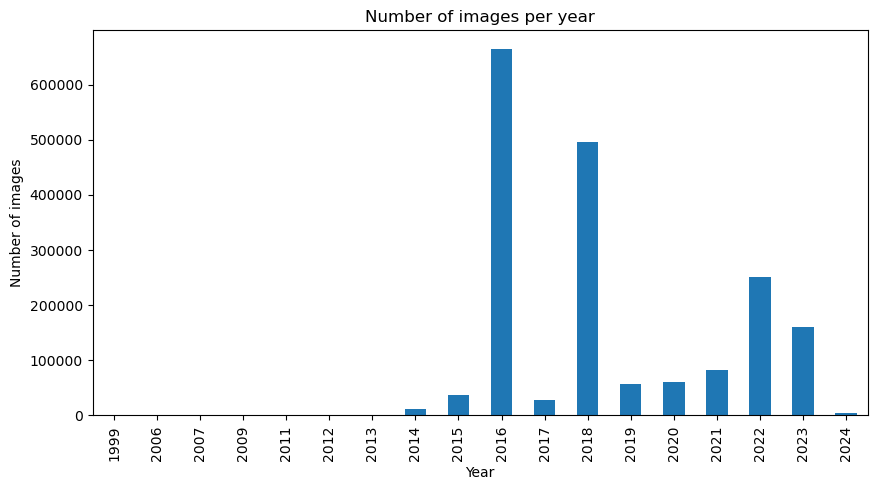

In [228]:
# Histogram for image_timestamp
df.groupby(['year']).size().plot(kind='bar', figsize=(10, 5), title='Number of images per year', xlabel='Year', ylabel='Number of images')

<Axes: title={'center': 'Number of images per year & month'}, ylabel='Number of images'>

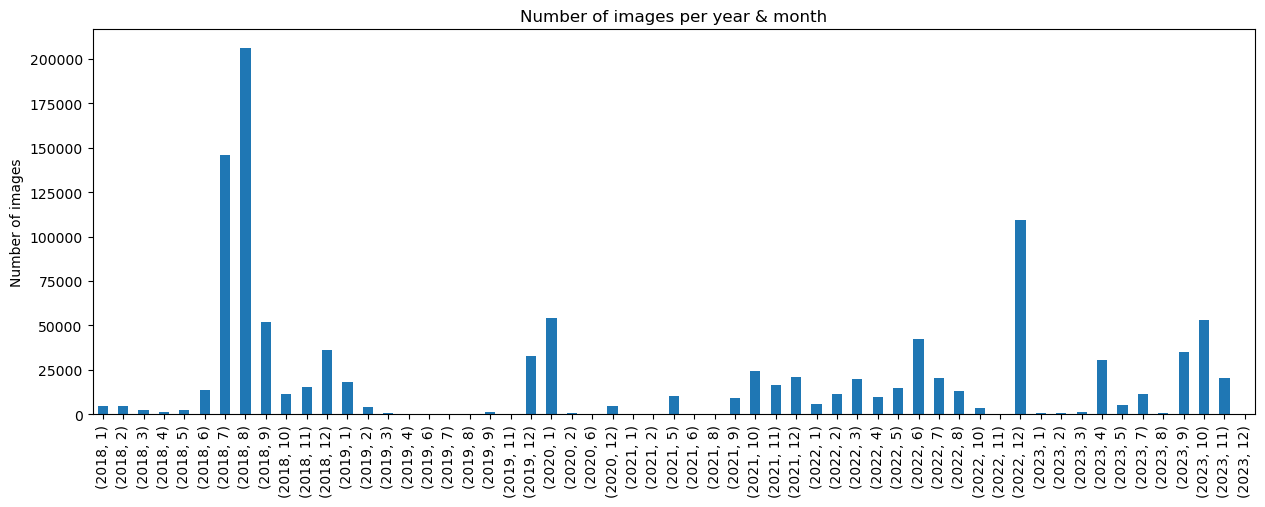

In [232]:
# Histogram for image_timestamp by year and month
df[(df['year']>=2018) & (df['year']<=2023)].groupby(['year', 'month']).size().plot(kind='bar', figsize=(15, 5), title='Number of images per year & month', xlabel='', ylabel='Number of images')

(0.0, 2000.0)

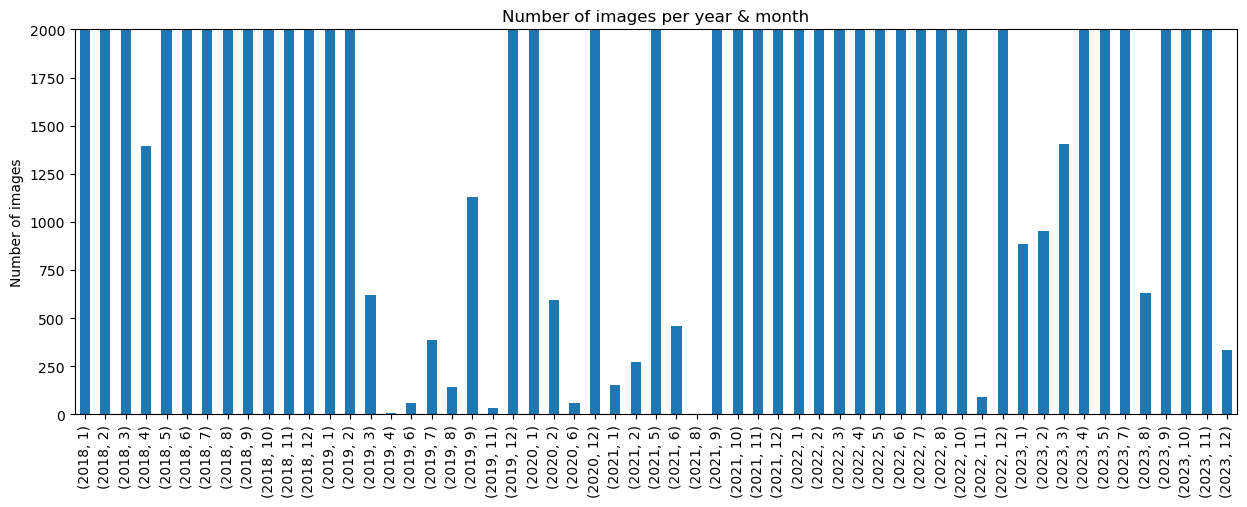

In [237]:
# Histogram for image_timestamp by year and month
df[(df['year']>=2018) & (df['year']<=2023)].groupby(['year', 'month']).size().plot(kind='bar', figsize=(15, 5), title='Number of images per year & month', xlabel='', ylabel='Number of images')
plt.ylim(0, 2000)

In [238]:
# Create a new column 'quarter'
def quarter(row):
    if row['month'] <= 3:
        return 'Q1'
    elif row['month'] <= 6:
        return 'Q2'
    elif row['month'] <= 9:
        return 'Q3'
    else:
        return 'Q4'
    
df['quarter'] = df.apply(quarter, axis=1)

In [239]:
df.head()

,image_id,user_id,sequence_id,image_coord,image_timestamp_unix,image_url,image_angle,chunk_id,image_timestamp,year,month,geoid,bboxid,GEOID,geometry,quarter
0,327669609883423,105986451641170,tpibOxJS5TYZ8V4crsIX9n,"[-122.49810039997101, 37.708604958036545]",1699723630093,https://scontent-iad3-2.xx.fbcdn.net/m1/v/t6/A...,4.955116,chunk_0,2023-11-11 17:27:10.093,2023,11,060750604002,bbox_2_7,060750604002,"POLYGON ((-122.51273 37.73509, -122.51008 37.7...",Q4
1,303401841368941,102905365286641,14jeyr2dygbpaexrxv7bqb,"[-122.49807357788086, 37.708991157486594]",1495412840007,https://scontent-iad3-2.xx.fbcdn.net/m1/v/t6/A...,7.626879,chunk_0,2017-05-22 00:27:20.007,2017,5,060750604002,bbox_2_7,060750604002,"POLYGON ((-122.51273 37.73509, -122.51008 37.7...",Q2
2,329903498499807,104408981801642,v66wj3bf8pakks2pq1ws47,"[-122.49806821346283, 37.70853281066343]",1545518762168,https://scontent-iad3-2.xx.fbcdn.net/m1/v/t6/A...,5.560757,chunk_0,2018-12-22 22:46:02.168,2018,12,060750604002,bbox_2_7,060750604002,"POLYGON ((-122.51273 37.73509, -122.51008 37.7...",Q4
3,274600944394813,104408981801642,52l7p54xlo9r92li3feskq,"[-122.4981701374054, 37.708961449908045]",1531338525997,https://scontent-iad3-2.xx.fbcdn.net/m1/v/t6/A...,183.032623,chunk_0,2018-07-11 19:48:45.997,2018,7,060750604002,bbox_2_7,060750604002,"POLYGON ((-122.51273 37.73509, -122.51008 37.7...",Q3
4,519584729064799,104408981801642,d85uqp4g9lwq0vzt32vao1,"[-122.49844908714294, 37.70762884056478]",1531702119180,https://scontent-iad3-2.xx.fbcdn.net/m1/v/t6/A...,185.561066,chunk_0,2018-07-16 00:48:39.180,2018,7,060750604002,bbox_2_7,060750604002,"POLYGON ((-122.51273 37.73509, -122.51008 37.7...",Q3


(0.0, 2000.0)

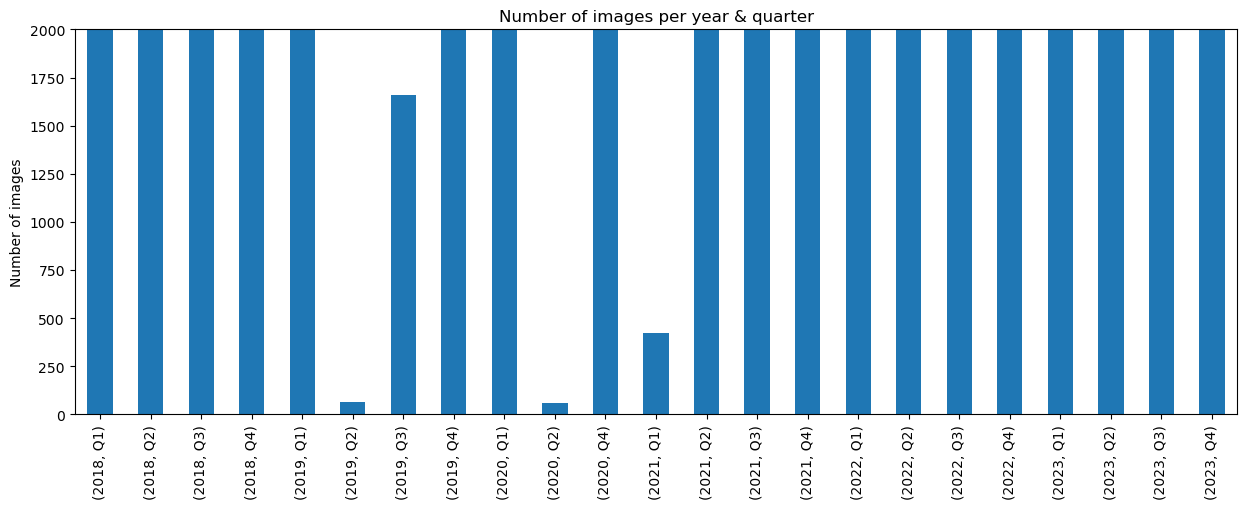

In [307]:
# Histogram for image_timestamp by year and month
df[(df['year']>=2018) & (df['year']<=2023)].groupby(['year', 'quarter']).size().plot(kind='bar', figsize=(15, 5), title='Number of images per year & quarter', xlabel='', ylabel='Number of images')
plt.ylim(0, 2000)

<Axes: xlabel='geoid'>

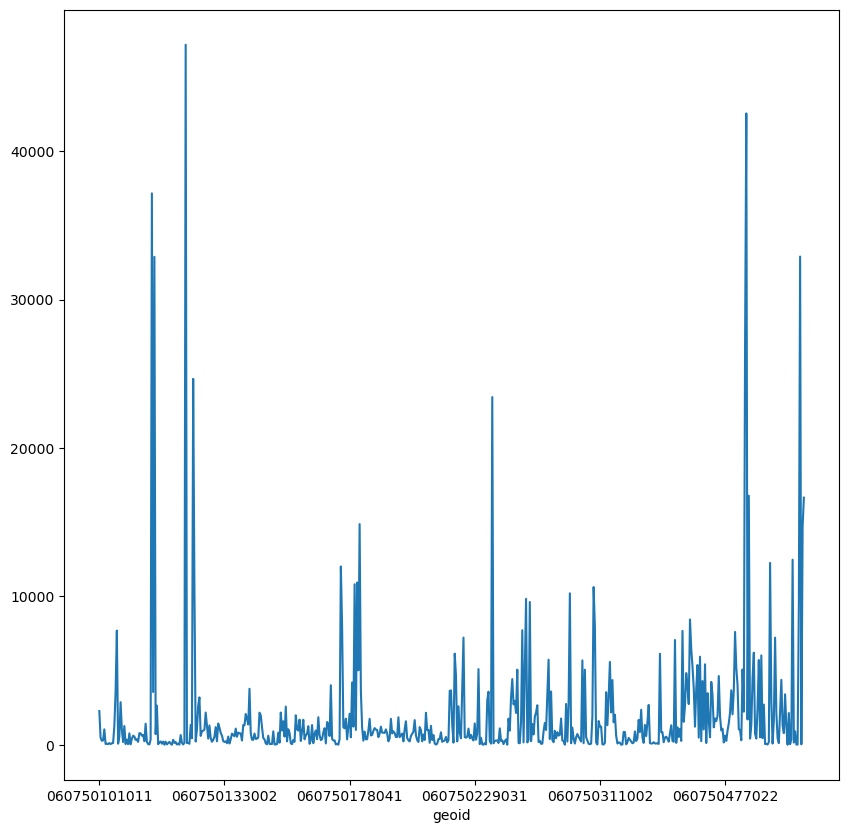

In [244]:
df_geo[(df_geo['year']>=2018) & (df_geo['year']<=2023)].groupby(['geoid']).size().plot(figsize=(10, 10))

In [63]:
df[df['year']==2023].groupby(['chunk_id','month']).size().sort_values(ascending=False).describe()

count     476.000000
mean      234.556723
std       371.472216
min         4.000000
25%         8.000000
50%       122.000000
75%       276.250000
max      2334.000000
dtype: float64

In [24]:
df.groupby('bbox_id').describe()['image_timestamp']

,count,mean,min,25%,50%,75%,max,std
bbox_id,,,,,,,,
bbox_0,18000,2017-07-11 12:41:08.511756032,2014-09-10 14:25:34,2016-10-09 11:48:27,2016-10-12 13:58:28.500000,2018-07-16 23:40:22.385999872,2023-11-11 17:57:20.600000,NaN
bbox_1,20494,2018-05-13 00:00:41.651592192,2014-09-10 14:24:58,2016-10-12 11:09:23.249999872,2018-07-20 16:26:17.743000064,2018-12-04 16:55:58.264000,2024-04-10 16:32:06.311000,NaN
bbox_10,16825,2018-01-10 20:09:19.144817152,2014-09-10 20:59:31,2016-09-20 11:51:51,2016-10-10 14:32:08,2018-08-18 01:12:07.588000,2024-05-20 22:38:24.181000,NaN
bbox_11,18823,2018-01-13 01:28:55.871272704,2014-09-10 14:24:08,2016-09-20 11:47:48,2016-10-10 10:52:20,2018-08-24 19:17:31.971000064,2024-05-20 22:42:35.365000,NaN
bbox_12,18423,2017-11-08 09:37:22.206406400,2014-09-10 14:24:02,2016-09-19 12:26:17.500000,2016-10-04 13:51:11,2018-08-15 02:49:10.144000,2024-04-22 10:52:46.996000,NaN
bbox_13,19868,2017-09-17 20:10:24.828762624,2014-09-10 14:23:56,2016-09-16 13:48:48,2016-10-04 13:46:32,2018-08-09 17:48:55.054249984,2024-05-20 22:44:37.887000,NaN
bbox_14,24093,2017-11-26 08:38:59.942660864,2014-09-10 14:23:50,2016-09-16 14:06:08,2016-10-08 13:49:22,2018-08-15 01:04:09.131000064,2024-05-20 22:49:05.088000,NaN
bbox_15,24781,2017-10-26 16:01:29.965489152,2014-09-10 14:23:40,2016-09-16 12:53:23,2016-10-08 13:20:04,2018-08-10 02:52:12.873999872,2024-05-20 22:47:12.208000,NaN
bbox_16,24321,2017-07-07 08:07:01.523980032,2014-09-10 14:23:28,2016-09-16 12:14:47,2016-10-04 14:16:03,2018-07-16 00:46:17.795000064,2023-11-11 17:59:21.800000,NaN


In [40]:
# Remove Year 2006
df = df[df['year'] != 2006]

<Axes: xlabel='year'>

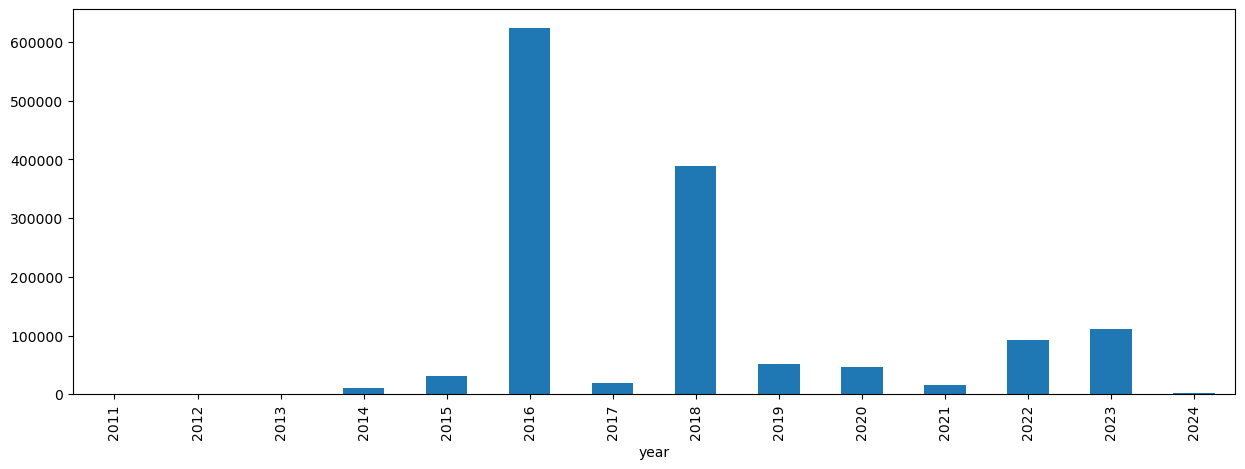

In [41]:

df.groupby(['year']).size().plot(kind='bar', figsize=(15, 5))
#, title='Number of images per month', xlabel='Year, Month', ylabel='Number of images'

<Axes: xlabel='year,month'>

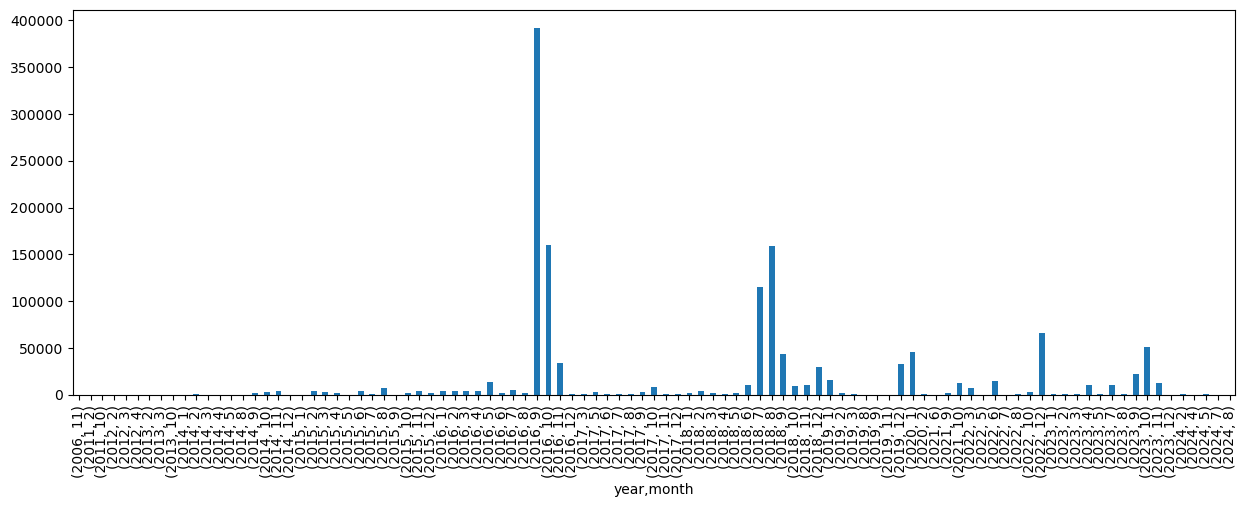

In [31]:

df.groupby(['year', 'month']).size().plot(kind='bar', figsize=(15, 5))
#, title='Number of images per month', xlabel='Year, Month', ylabel='Number of images'

In [32]:
# Filter out the images taken between 2018 and 2023
df2 = df[(df['year'] >= 2018) & (df['year'] <= 2023)]

(0.0, 15000.0)

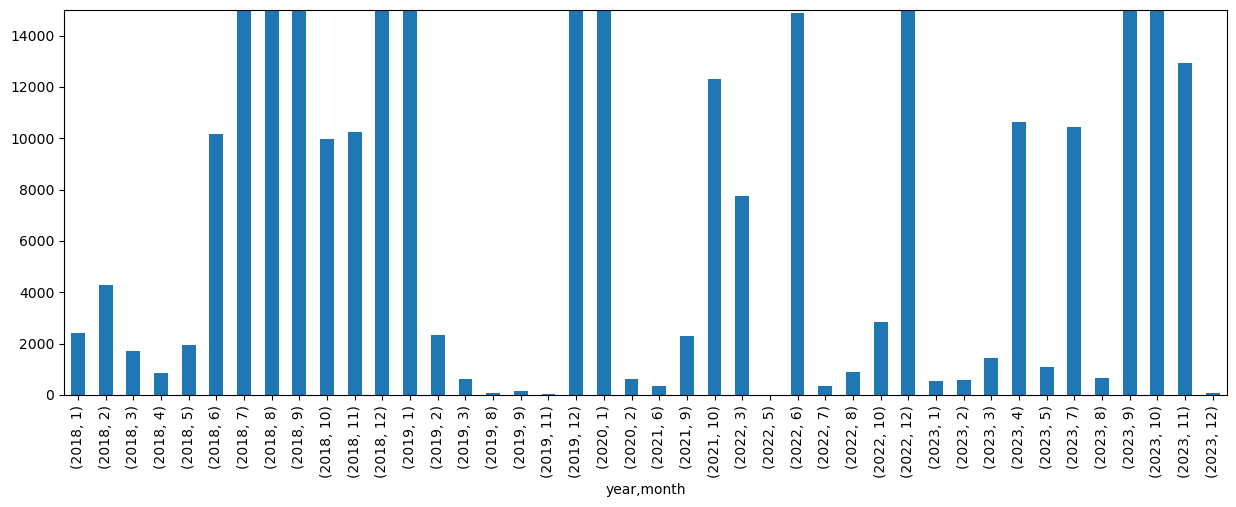

In [67]:
df2.groupby(['year', 'month']).size().plot(kind='bar', figsize=(15, 5))
plt.ylim(0, 15000)

In [37]:
df2.head()

,Unnamed: 0,image_id,user_id,sequence_id,image_coord,image_timestamp_unix,image_url,image_angle,bbox_id,image_timestamp,year,month
0,0,327669609883423,105986451641170,tpibOxJS5TYZ8V4crsIX9n,"[-122.49810039997101, 37.708604958036545]",1699723630093,https://scontent-iad3-2.xx.fbcdn.net/m1/v/t6/A...,4.955116,bbox_0,2023-11-11 17:27:10.093,2023,11
2,2,329903498499807,104408981801642,v66wj3bf8pakks2pq1ws47,"[-122.49806821346283, 37.70853281066343]",1545518762168,https://scontent-iad3-2.xx.fbcdn.net/m1/v/t6/A...,5.560757,bbox_0,2018-12-22 22:46:02.168,2018,12
3,3,274600944394813,104408981801642,52l7p54xlo9r92li3feskq,"[-122.4981701374054, 37.708961449908045]",1531338525997,https://scontent-iad3-2.xx.fbcdn.net/m1/v/t6/A...,183.032623,bbox_0,2018-07-11 19:48:45.997,2018,7
4,4,519584729064799,104408981801642,d85uqp4g9lwq0vzt32vao1,"[-122.49844908714294, 37.70762884056478]",1531702119180,https://scontent-iad3-2.xx.fbcdn.net/m1/v/t6/A...,185.561066,bbox_0,2018-07-16 00:48:39.180,2018,7
5,5,2909031882698271,104408981801642,r88eh0cjmgqeph3o9rtz1c,"[-122.49803602695465, 37.70875774047717]",1531784414929,https://scontent-iad3-2.xx.fbcdn.net/m1/v/t6/A...,5.298077,bbox_0,2018-07-16 23:40:14.929,2018,7


<Axes: xlabel='bbox_id'>

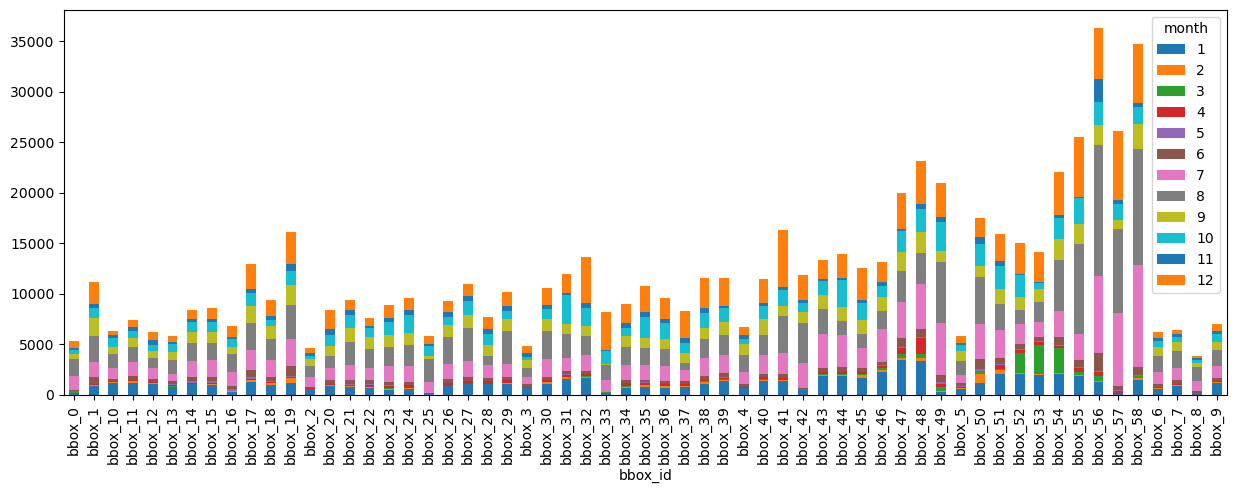

In [38]:
df2.groupby(['bbox_id', 'month']).size().unstack().plot(kind='bar', stacked=True, figsize=(15, 5))


.DS_Store























...

In [65]:
df.shape

(1393278, 13)

In [78]:
bbox_0 = pd.read_csv('/Users/wooyongjung/WJ_Projects/homeless_sf_2024/data/df_bboxid/df_geoid_bboxid_0.csv')
bbox_0.head()

,Unnamed: 0,image_id,user_id,sequence_id,image_coord,image_timestamp_unix,image_url,image_angle,geoid,bboxid
0,0,1129970550820440,104408981801642,r88eh0cjmgqeph3o9rtz1c,"[-122.49810039997101, 37.70827392833466]",1531784412321,https://scontent-ams2-1.xx.fbcdn.net/m1/v/t6/A...,5.738226,60750604002,bbox_2_7
1,1,222698235968761,104408981801642,4l34inq61qxcui625bw17r,"[-122.49812185764313, 37.708452175280954]",1532021324163,https://scontent-ams2-1.xx.fbcdn.net/m1/v/t6/A...,5.572657,60750604002,bbox_2_7
2,2,373422844113276,104408981801642,oda1u8ajtxcqzpxo1dxk2s,"[-122.49806821346283, 37.70842246748634]",1533780915099,https://scontent-ams2-1.xx.fbcdn.net/m1/v/t6/A...,5.625000,60750604002,bbox_2_7
3,3,472745754006878,104408981801642,v66wj3bf8pakks2pq1ws47,"[-122.49812185764313, 37.70805748503781]",1545518759942,https://scontent-ams2-1.xx.fbcdn.net/m1/v/t6/A...,5.579886,60750604002,bbox_2_7
4,4,153884446631005,104408981801642,7eatlrgsdpk4djajowdp51,"[-122.49819159507751, 37.707841041108836]",1534527865634,https://scontent-ams2-1.xx.fbcdn.net/m1/v/t6/A...,5.734448,60750604002,bbox_2_7


In [79]:
df_0 = pd.read_csv('/Users/wooyongjung/WJ_Projects/homeless_sf_2024/data/df_mapillary_sf/df_mapillary_00.csv')
df_0.head()

,Unnamed: 0,image_id,user_id,sequence_id,image_coord,image_timestamp_unix,image_url,image_angle,bbox_id,chunk_id
0,0,327669609883423,105986451641170,tpibOxJS5TYZ8V4crsIX9n,"[-122.49810039997101, 37.708604958036545]",1699723630093,https://scontent-iad3-2.xx.fbcdn.net/m1/v/t6/A...,4.955116,bbox_0,chunk_0
1,1,303401841368941,102905365286641,14jeyr2dygbpaexrxv7bqb,"[-122.49807357788086, 37.708991157486594]",1495412840007,https://scontent-iad3-2.xx.fbcdn.net/m1/v/t6/A...,7.626879,bbox_0,chunk_0
2,2,329903498499807,104408981801642,v66wj3bf8pakks2pq1ws47,"[-122.49806821346283, 37.70853281066343]",1545518762168,https://scontent-iad3-2.xx.fbcdn.net/m1/v/t6/A...,5.560757,bbox_0,chunk_0
3,3,274600944394813,104408981801642,52l7p54xlo9r92li3feskq,"[-122.4981701374054, 37.708961449908045]",1531338525997,https://scontent-iad3-2.xx.fbcdn.net/m1/v/t6/A...,183.032623,bbox_0,chunk_0
4,4,519584729064799,104408981801642,d85uqp4g9lwq0vzt32vao1,"[-122.49844908714294, 37.70762884056478]",1531702119180,https://scontent-iad3-2.xx.fbcdn.net/m1/v/t6/A...,185.561066,bbox_0,chunk_0


In [80]:
print(bbox_0.shape)
print(df_0.shape)

(18000, 10)
(18000, 10)


In [141]:
bbox_81 = pd.read_csv('/Users/wooyongjung/WJ_Projects/homeless_sf_2024/data/df_bboxid/df_geoid_bboxid_81.csv')
df_81 = pd.read_csv('/Users/wooyongjung/WJ_Projects/homeless_sf_2024/data/df_mapillary_sf/df_mapillary_81.csv')
print(bbox_1.shape)
print(df_1.shape)

(21004, 10)
(20494, 10)


In [145]:
bbox_80 = pd.read_csv('/Users/wooyongjung/WJ_Projects/homeless_sf_2024/data/df_bboxid/df_geoid_bboxid_91.csv')
df_80 = pd.read_csv('/Users/wooyongjung/WJ_Projects/homeless_sf_2024/data/df_mapillary_sf/df_mapillary_91.csv')
print(bbox_80.shape)
print(df_80.shape)

(279, 5)
(279, 8)


In [83]:
bbox_3 = pd.read_csv('/Users/wooyongjung/WJ_Projects/homeless_sf_2024/data/df_bboxid/df_geoid_bboxid_3.csv')
df_3 = pd.read_csv('/Users/wooyongjung/WJ_Projects/homeless_sf_2024/data/df_mapillary_sf/df_mapillary_03.csv')
print(bbox_3.shape)
print(df_3.shape)

(18325, 10)
(18237, 10)


In [95]:
bbox_13 = pd.read_csv('/Users/wooyongjung/WJ_Projects/homeless_sf_2024/data/df_bboxid/df_geoid_bboxid_14.csv')
df_13 = pd.read_csv('/Users/wooyongjung/WJ_Projects/homeless_sf_2024/data/df_mapillary_sf/df_mapillary_14.csv')
print(bbox_13.shape)
print(df_13.shape)

(24093, 5)
(24093, 10)


In [96]:
bbox_17 = pd.read_csv('/Users/wooyongjung/WJ_Projects/homeless_sf_2024/data/df_bboxid/df_geoid_bboxid_17.csv')
df_17 = pd.read_csv('/Users/wooyongjung/WJ_Projects/homeless_sf_2024/data/df_mapillary_sf/df_mapillary_17.csv')
print(bbox_17.shape)
print(df_17.shape)

(33315, 5)
(33315, 10)


In [98]:
bbox_17 = pd.read_csv('/Users/wooyongjung/WJ_Projects/homeless_sf_2024/data/df_bboxid/df_geoid_bboxid_30.csv')
df_17 = pd.read_csv('/Users/wooyongjung/WJ_Projects/homeless_sf_2024/data/df_mapillary_sf/df_mapillary_30.csv')
print(bbox_17.shape)
print(df_17.shape)

(21164, 5)
(21142, 10)
